IMPORT LIBRARIES AND MODULES

In [430]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np
import joblib

DATAFRAME AND PREPROCESSING

In [480]:
dir = r"C:\Users\cdhan\Desktop\Mushroom_classification.xlsx"
data = pd.read_excel(dir)
data.columns = [col.strip() for col in data.columns]
data.drop_duplicates(inplace=True)
data.head()
data.info()
data.duplicated().sum()
data.dropna


<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 637
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 564 non-null    object
 1   cap-surface               564 non-null    object
 2   cap-color                 564 non-null    object
 3   bruises                   564 non-null    object
 4   odor                      564 non-null    object
 5   gill-attachment           564 non-null    object
 6   gill-spacing              564 non-null    object
 7   gill-size                 564 non-null    object
 8   gill-color                564 non-null    object
 9   stalk-shape               564 non-null    object
 10  stalk-root                564 non-null    object
 11  stalk-surface-above-ring  564 non-null    object
 12  stalk-surface-below-ring  564 non-null    object
 13  stalk-color-above-ring    564 non-null    object
 14  stalk-color-below-ring    564 n

<bound method DataFrame.dropna of     cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0           c           s         g       t    f               f            c   
1           x           s         w       f    m               f            c   
2           x           s         w       f    m               f            c   
3           x           s         w       f    m               f            c   
4           x           s         w       f    m               f            c   
..        ...         ...       ...     ...  ...             ...          ...   
633         x           y         w       t    l               f            c   
634         b           y         w       t    a               f            c   
635         x           y         n       t    p               f            c   
636         f           y         n       t    l               f            c   
637         x           s         w       t    l               f           

Mapping Data 

In [481]:
data['cap-shape'] = data['cap-shape'].map({'b': 0, 'c': 1, 'f': 2, 's': 3, 'x': 4})
data['cap-surface'] = data['cap-surface'].map({'f': 0, 's': 1, 'y': 2})
data['cap-color'] = data['cap-color'].map({'b': 0, 'e': 1, 'g': 2, 'n': 3, 'o': 4, 'v': 5, 'w': 6, 'y': 7})
data['bruises'] = data['bruises'].map({'a': 0, 'f': 1, 't': 2, 'y': 3})
data['odor'] = data['odor'].map({'a': 0, 'd': 1, 'e': 2, 'f': 3, 'l': 4, 'm': 5, 'n': 6, 'p': 7})
data['gill-attachment'] = data['gill-attachment'].map({'a': 0, 'd': 1, 'f': 2})
data['gill-spacing'] = data['gill-spacing'].map({'c': 0, 'w': 1})
data['gill-size'] = data['gill-size'].map({'b': 0, 'n': 1})
data['gill-color'] = data['gill-color'].map({'e': 0, 'g': 1, 'h': 2, 'k': 3, 'n': 4, 'p': 5, 'w': 6, 'y': 7})
data['stalk-shape'] = data['stalk-shape'].map({'e': 0, 's': 1, 't': 2})
data['stalk-root'] = data['stalk-root'].map({'a': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4, 'u': 5, 'z': 6})
data['stalk-surface-above-ring'] = data['stalk-surface-above-ring'].map({'f': 0, 's': 1})
data['stalk-surface-below-ring'] = data['stalk-surface-below-ring'].map({'f': 0, 's': 1, 'y': 2})
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].map({'g': 0, 'p': 1, 'w': 2, 'y': 3})
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].map({'b': 0, 'p': 1, 'w': 2, 'y': 3})
data['veil-type'] = data['veil-type'].map({'n': 0, 'p': 1})
data['veil-color'] = data['veil-color'].map({'n': 0, 'w': 1})
data['ring-number'] = data['ring-number'].map({'n': 0, 'o': 1})
data['ring-type'] = data['ring-type'].map({'e': 0, 'n': 1, 'p': 2})
data['spore-print-color'] = data['spore-print-color'].map({'b': 0, 'k': 1, 'n': 2, 'p': 3, 'u': 4, 'w': 5})
data['population'] = data['population'].map({'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5})
data['habitat'] = data['habitat'].map({'f':0,'d':1,'w':2,'g':3,'u':4,'p':5,'l':6,'m':7})

Intializing Features and Target

In [482]:
y = data.iloc[:, -1]  # only last column
y = y.ravel()
X = data.iloc[:, :-1]  # All columns except last column
print(data["class"].unique())
data["class"] = [0 if i == "p" else 1 for i in data["class"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = pd.get_dummies(X)
print(data["class"])

['p' 'e']
0      0
1      1
2      1
3      1
4      1
      ..
633    1
634    1
635    0
636    1
637    1
Name: class, Length: 564, dtype: int64


Outlier Elimination

Scaling Features

In [483]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Imputing null values with mean

In [484]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

Exploratory Data Analysis

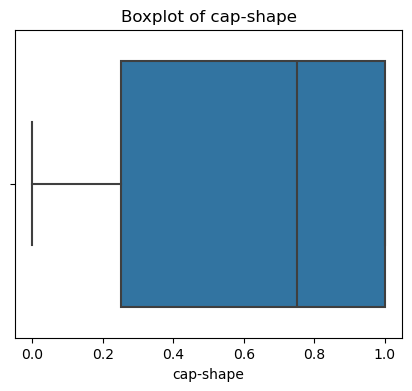

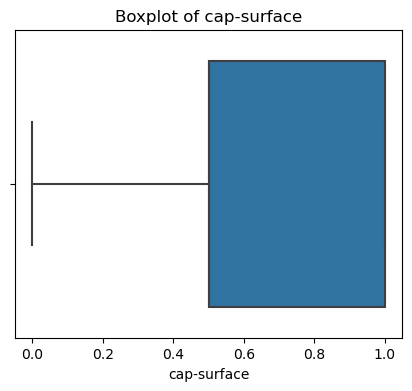

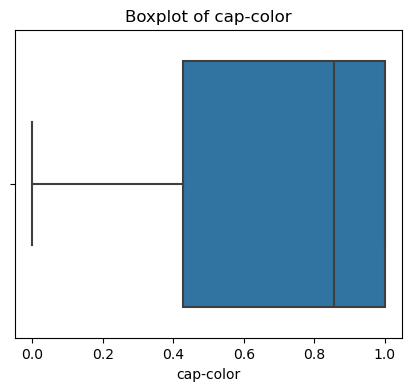

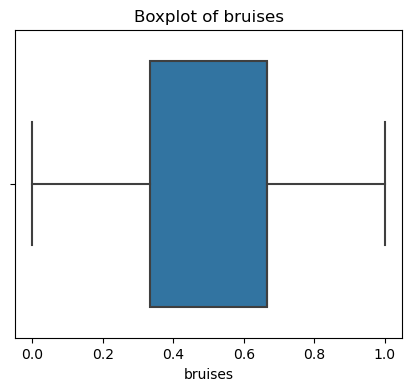

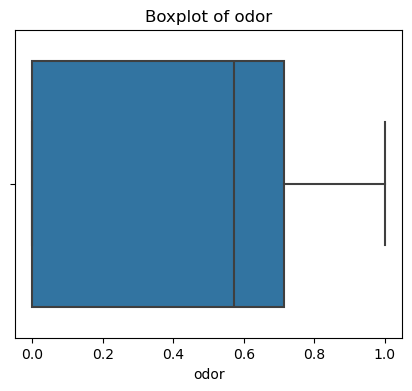

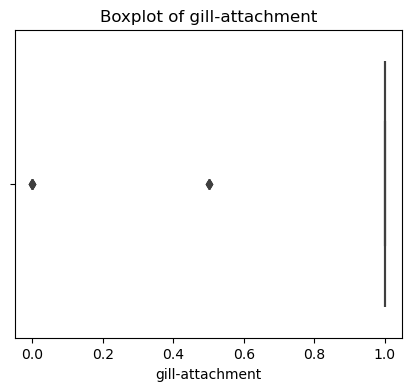

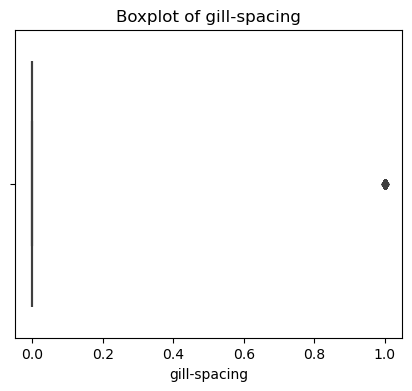

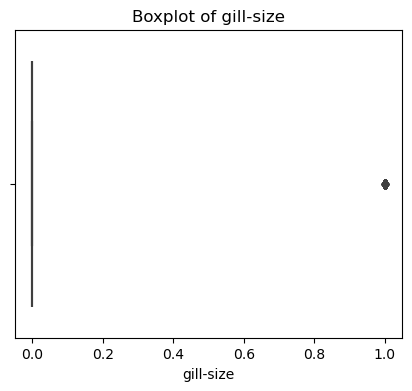

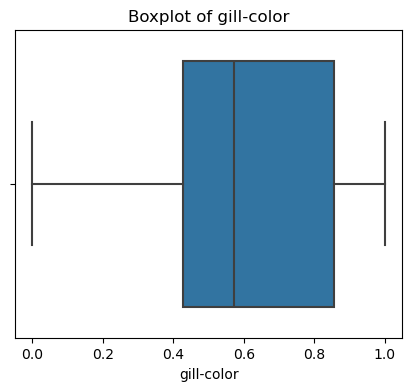

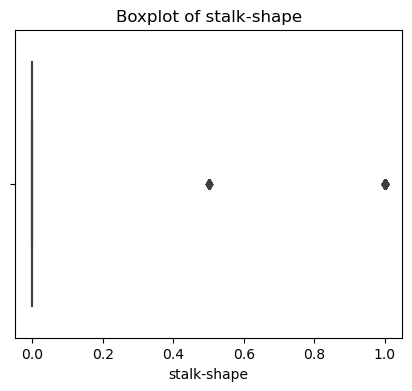

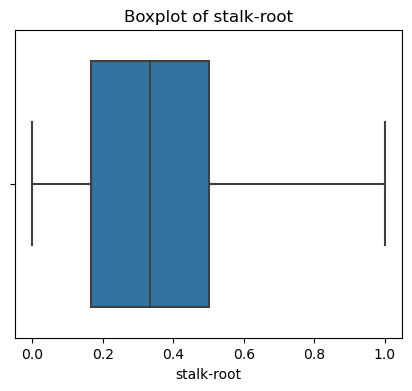

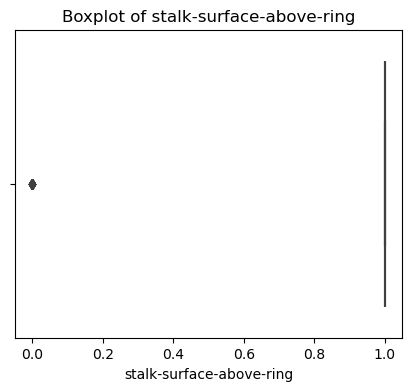

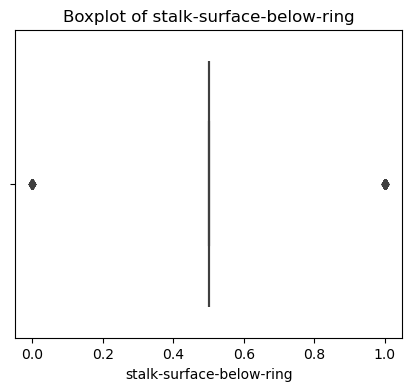

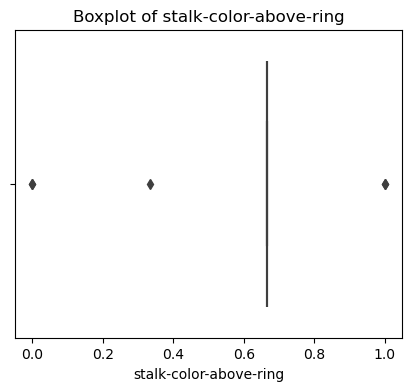

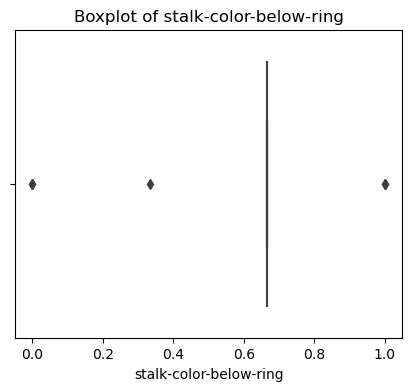

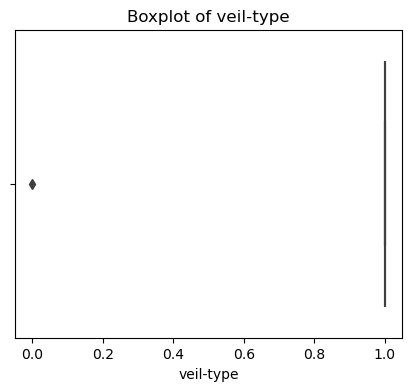

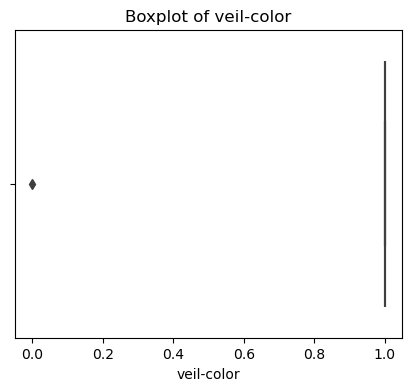

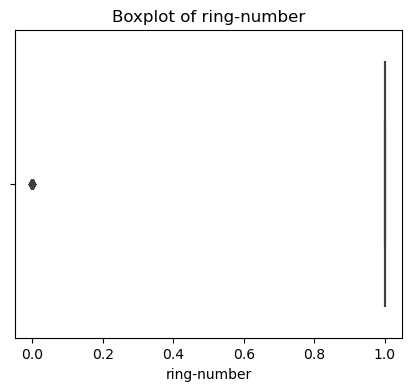

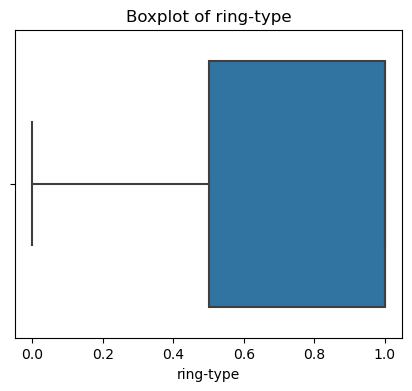

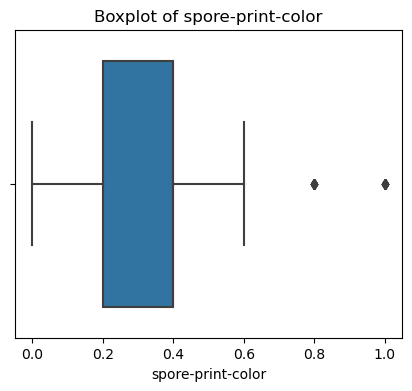

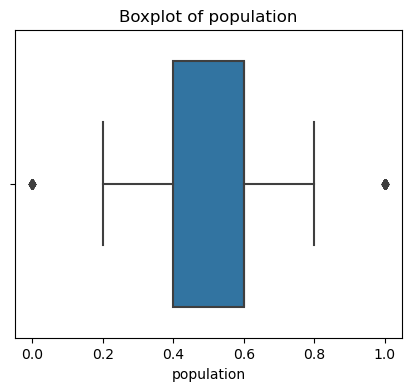

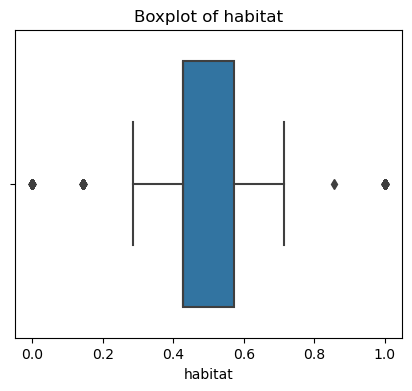

In [485]:
for column in X.columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

Split Train and Test Data

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

KNN MODEL TRAIN AND FIT

In [487]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_knn_pred = best_knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


print("Classification Report:")
print(classification_report(y_test, y_knn_pred, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_knn_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 90.59%
Classification Report:
              precision    recall  f1-score   support

           e       0.92      0.91      0.91       133
           p       0.68      0.70      0.69        37

    accuracy                           0.86       170
   macro avg       0.80      0.81      0.80       170
weighted avg       0.87      0.86      0.87       170

Confusion Matrix:
[[121  12]
 [ 11  26]]


CROSS VALIDATION VISUALIZATION OF KNN

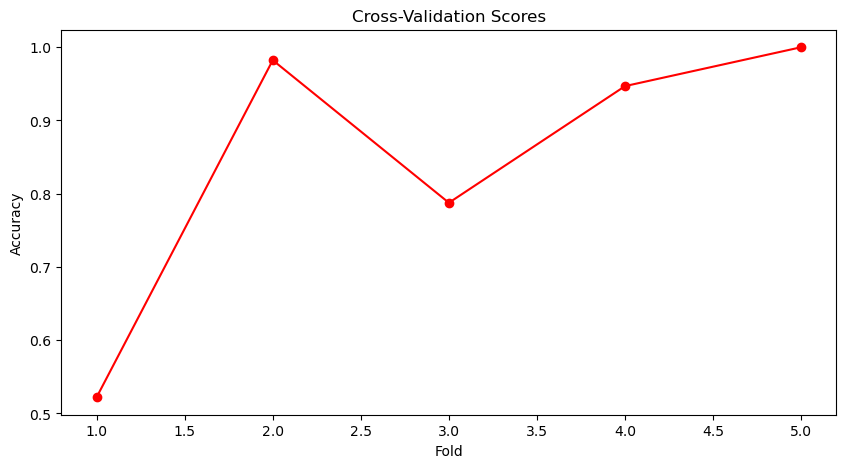

[0.52212389 0.98230088 0.78761062 0.94690265 1.        ]


In [488]:
scores = cross_val_score(best_knn, X, y, cv=5)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(scores) + 1),scores, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.grid(False)
plt.show();
print(scores)

CONFUSION MATRIX VISUALIZATION OF KNN MODEL

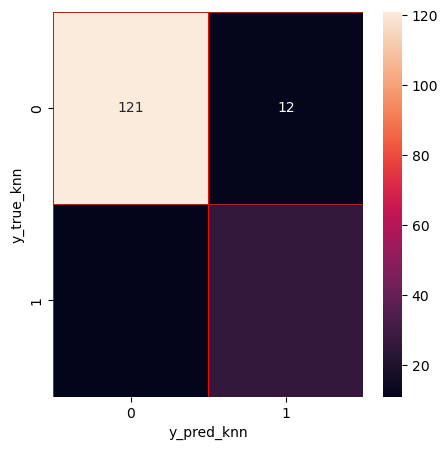

In [489]:
y_knn_pred = best_knn.predict(X_test)
y_true_knn = y_test
cm = confusion_matrix(y_true_knn, y_knn_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_true_knn")
plt.show()


RANDOM FOREST CLASSIFIER MODEL TRAIN AND FIT

In [490]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]  
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)


print("Best Parameters:", grid_search_rf.best_params_)


best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 87.65%
Classification Report:
              precision    recall  f1-score   support

           e       0.96      0.88      0.92       133
           p       0.67      0.86      0.75        37

    accuracy                           0.88       170
   macro avg       0.81      0.87      0.84       170
weighted avg       0.90      0.88      0.88       170

Confusion Matrix:
[[117  16]
 [  5  32]]


CROSS VALIDATION VISUALIZATION OF RANDOM FOREST CLASSIFIER

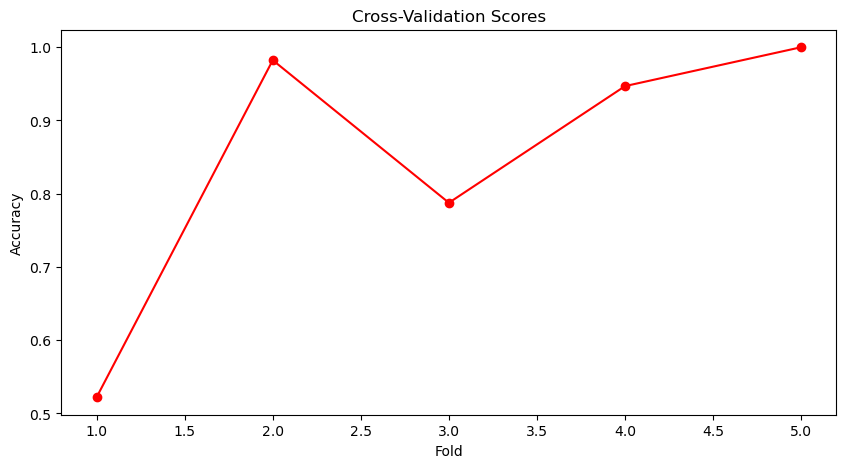

[0.5840708  0.98230088 0.80530973 0.94690265 1.        ]


In [491]:

scores1 = cross_val_score(best_rf, X, y, cv=5)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show();
print(scores1)

CONFUSION MATRIX VISUALIZATION OF RANDOM FOREST MODEL

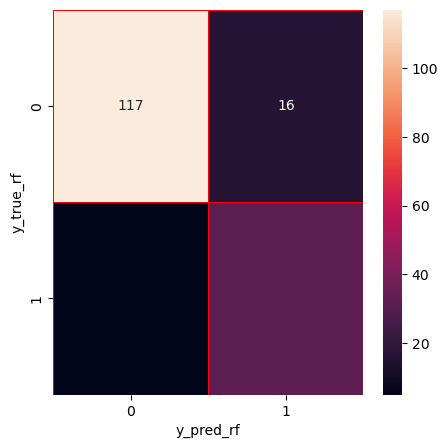

In [492]:
y_pred_rf = best_rf.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

LOGISTIC REGRESSION MODEL TRAIN AND FIT

In [493]:
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Solvers that support regularization
}

log_reg = LogisticRegression(max_iter=10000)


grid_search_log = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search_log.fit(X_train, y_train)


print("Best Parameters:", grid_search_log.best_params_)


best_log = grid_search_log.best_estimator_
y_pred_log = best_log.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {lr_accuracy * 100:.2f}%")


print("Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 88.24%
Classification Report:
              precision    recall  f1-score   support

           e       0.92      0.93      0.93       133
           p       0.74      0.70      0.72        37

    accuracy                           0.88       170
   macro avg       0.83      0.82      0.82       170
weighted avg       0.88      0.88      0.88       170

Confusion Matrix:
[[124   9]
 [ 11  26]]


CROSS VALIDATION VISUALIZATION OF LOGISTIC REGRESSION

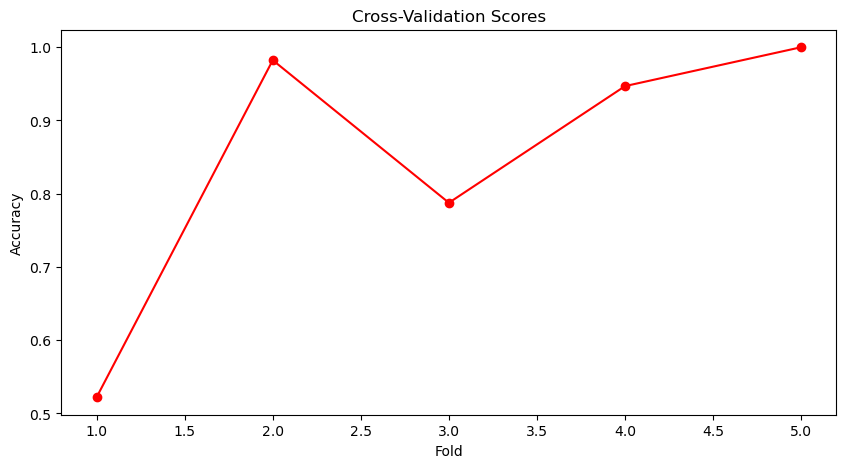

[0.54867257 1.         0.7699115  0.99115044 0.97321429]


In [494]:

scores2 = cross_val_score(best_log, X, y, cv=5)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show();
print(scores2)

CONFUSION MATRIX VISUALIZATION OF LOGISTIC REGRESSION MODEL

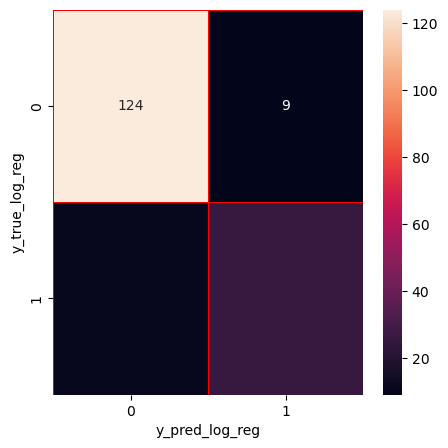

In [495]:
y_pred_log = best_log.predict(X_test)
y_true_log_reg = y_test
cm = confusion_matrix(y_true_log_reg, y_pred_log)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_log_reg")
plt.ylabel("y_true_log_reg")
plt.show()

SVM MODEL TRAIN AND FIT

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {svm_accuracy * 100:.2f}%")


print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 90.59%
Classification Report:
              precision    recall  f1-score   support

           e       0.91      0.98      0.94       133
           p       0.89      0.65      0.75        37

    accuracy                           0.91       170
   macro avg       0.90      0.81      0.85       170
weighted avg       0.90      0.91      0.90       170

Confusion Matrix:
[[130   3]
 [ 13  24]]


CROSS VALIDATION VISUALIZATION OF SVM

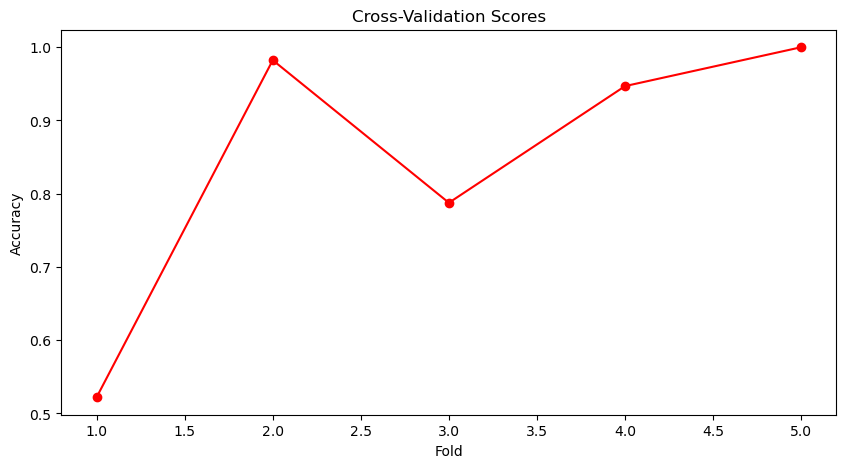

[0.54867257 0.98230088 0.7699115  0.94690265 1.        ]


In [497]:

scores3 = cross_val_score(best_svm, X, y, cv=5)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show();
print(scores3)

CONFUSION MATRIX VISUALIZATION OF SVM MODEL

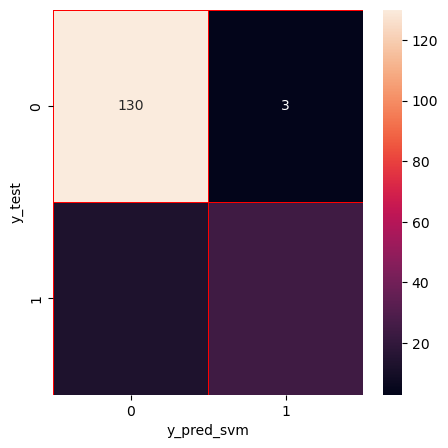

In [498]:

cm = confusion_matrix(y_test, y_pred_svm)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_test")
plt.show()

CROSS VALIDATION INSTANCES OF DIFFERENT METHODS

In [499]:
scores_knn = cross_val_score(best_knn, X, y, cv=5)
scores_rf = cross_val_score(best_rf, X, y, cv=5)
scores_log_reg = cross_val_score(best_log, X, y, cv=5)
scores_svm = cross_val_score(best_svm, X, y, cv=5)



In [500]:
import numpy as np
mean_knn = np.mean(scores_knn)
mean_rf = np.mean(scores_rf)
mean_log_reg = np.mean(scores_log_reg)
mean_svm = np.mean(scores_svm)


PRINT MEAN AND STD

In [501]:
print(f"KNN: Mean={mean_knn:.4f}")
print(f"Random Forest: Mean={mean_rf:.4f}")
print(f"Logistic Regression: Mean={mean_log_reg:.4f}")
print(f"SVM: Mean={mean_svm:.4f}")


KNN: Mean=0.8478
Random Forest: Mean=0.8673
Logistic Regression: Mean=0.8566
SVM: Mean=0.8496


GETTING BEST ALGORITHM BASED ON THE CROSS VAL SCORE

In [502]:
mean_scores = {
    'KNN': mean_knn,
    'Random Forest': mean_rf,
    'Logistic Regression': mean_log_reg,
    'SVM': mean_svm
}

best_model = max(mean_scores, key=mean_scores.get)
print(f"Best model: {best_model} with a mean score of {mean_scores[best_model]:.4f}")


Best model: Random Forest with a mean score of 0.8673


Getting Best Model

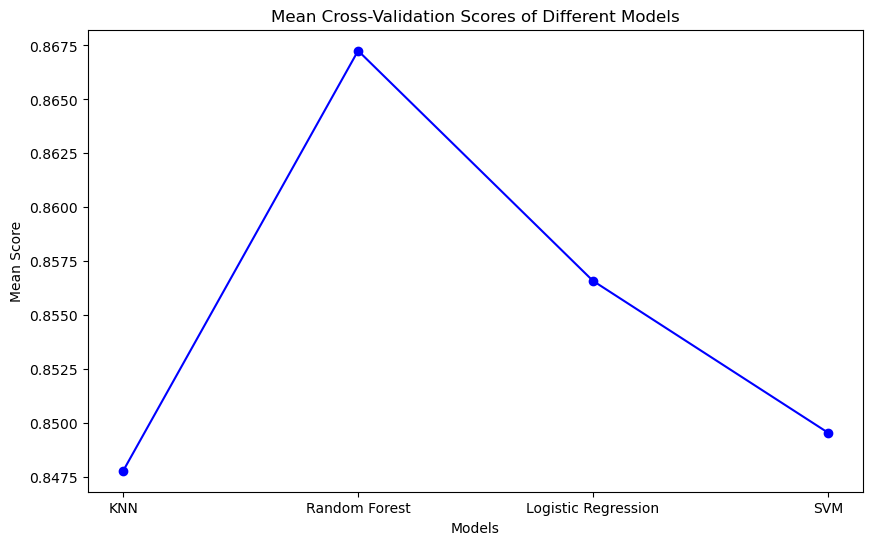

In [504]:
models = list(mean_scores.keys())
scores = list(mean_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(models, scores, marker='o', linestyle='-', color='b')
plt.title('Mean Cross-Validation Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Score')

plt.grid(False)

In [505]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Predicting unknown Data

In [506]:

data1 = ["x", "y", "n", "t", "p", "f", "c", "n", "w", "e", "e", "s", "s", "w", "w", "p", "w", "o", "p", "n", "v", "u"]



input_data = pd.DataFrame([data1],columns=[
    "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
    "stalk-surface-below-ring", "stalk-color-above-ring", 
    "stalk-color-below-ring", "veil-type", "veil-color", 
    "ring-number", "ring-type", "spore-print-color", "population", 
    "habitat"
])


input_data_encoded = pd.get_dummies(input_data)

input_data_encoded = input_data_encoded.reindex(columns=X.columns, fill_value=0)


predic = best_knn.predict(input_data_encoded)
print("Prediction:", predic)


Prediction: [0]


In [509]:

data2 = ['s', 'f', 'g', 'f', 'n', 'f', 'c', 'n', 'p', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'y', 'u']

input_data2 = pd.DataFrame([data2], columns=[
    "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
    "stalk-surface-below-ring", "stalk-color-above-ring", 
    "stalk-color-below-ring", "veil-type", "veil-color", 
    "ring-number", "ring-type", "spore-print-color", "population", 
    "habitat"
])

input_data_encoded2 = pd.get_dummies(input_data2)

input_data_encoded2 = input_data_encoded2.reindex(columns=X.columns, fill_value=0) 

predicc = best_rf.predict(input_data_encoded2)

predicc_labels = label_encoder.inverse_transform(predicc)
print("Prediction:", predicc_labels)


Prediction: ['e']


Save the model

In [510]:
joblib.dump(knn, 'model.pkl')
joblib.dump(rf , 'rf_model.pkl')
joblib.dump(best_svm, 'svm__model.pkl')
joblib.dump(log_reg, 'lg_model.pkl')
# Load the model from the file
loaded_model_rf = joblib.load('rf_model.pkl')
loaded_model_knn = joblib.load('model.pkl')
loaded_model_svm = joblib.load('svm__model.pkl')
loaded_model_lg = joblib.load('lg_model.pkl')